<a href="https://colab.research.google.com/github/hansjang/Py_Radar/blob/main/%EB%8D%B0%EC%8B%B8%EB%9D%BC%EB%A9%B4Part4_P111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hansjang/Py_Radar.git

import shutil
shutil.move('Py_Radar/data', '/content/data')

# 폴더와 그 안의 모든 파일을 삭제
# !rm -rf /content/Py_Radar
# !rm -rf /content/data

Cloning into 'Py_Radar'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 133 (delta 63), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (133/133), 5.29 MiB | 5.80 MiB/s, done.
Resolving deltas: 100% (63/63), done.


'/content/data'

In [19]:
# 데이터 불러오기
import numpy as np
import pandas as pd

df = pd.read_csv('/content/data/greats200.csv', encoding='utf-8')

display(df.head())
display(df.shape)   # (200,11)
display(df.isna().sum())

,NAME,AGE,BIRTH_YEAR,DEATH_YEAR,JOB,CJENM,TVCHOSUN,MBC,EBS,TVN,SONG100
0,단군,삼국시대,-2333.0,-425.0,정치인,29586564,3444410,5200000,240452,4537700,1
1,동명왕,삼국시대,-58.0,19.0,정치인,17700,6700,0,19649,20000,1
2,온조왕,삼국시대,-36.0,28.0,정치인,0,0,0,30394,54000,1
3,김수로,삼국시대,42.0,199.0,정치인,26373800,6044361,32320600,571093,1707600,0
4,박혁거세,삼국시대,-69.0,4.0,정치인,5216000,1039000,1620000,31444,1638400,1


(200, 11)

,0
NAME,0
AGE,0
BIRTH_YEAR,5
DEATH_YEAR,1
JOB,0
CJENM,0
TVCHOSUN,0
MBC,0
EBS,0
TVN,0


In [16]:
# 결측치 행 확인
missing_rows = df[df.isna().any(axis=1)]
display(missing_rows) # [7,12, 25, 30, 35, 53]

# 결측치 ffill()로 대체
df2 = df.ffill()

display(df2.iloc[[7,12, 25, 30, 35, 53]])
display(df2.isna().sum())

,NAME,AGE,BIRTH_YEAR,DEATH_YEAR,JOB,CJENM,TVCHOSUN,MBC,EBS,TVN,SONG100
7,백결선생,삼국시대,414.0,NaN,예술가,0,0,4620000,6630,0,1
12,계백,삼국시대,NaN,660.0,군인,445000,12779,300000,136916,1178600,1
25,양규,고려,NaN,1011.0,군인,1502000,361,0,38000,1302000,0
30,척준경,고려,NaN,1144.0,군인,5891000,502517,0,2940000,1951000,0
35,이인로,고려,NaN,1220.0,문학가,0,571,0,15800,0,1
53,홍길동,조선전기,NaN,1500.0,운동가,27522398,1541021,11250000,956600,2206200,1


,NAME,AGE,BIRTH_YEAR,DEATH_YEAR,JOB,CJENM,TVCHOSUN,MBC,EBS,TVN,SONG100
7,백결선생,삼국시대,414.0,413.0,예술가,0,0,4620000,6630,0,1
12,계백,삼국시대,590.0,660.0,군인,445000,12779,300000,136916,1178600,1
25,양규,고려,877.0,1011.0,군인,1502000,361,0,38000,1302000,0
30,척준경,고려,1055.0,1144.0,군인,5891000,502517,0,2940000,1951000,0
35,이인로,고려,1206.0,1220.0,문학가,0,571,0,15800,0,1
53,홍길동,조선전기,1415.0,1500.0,운동가,27522398,1541021,11250000,956600,2206200,1


,0
NAME,0
AGE,0
BIRTH_YEAR,0
DEATH_YEAR,0
JOB,0
CJENM,0
TVCHOSUN,0
MBC,0
EBS,0
TVN,0


In [23]:
# 수치형 데이터만 추출 => 유튜브 조회수 ['CJENM',	'TVCHOSUN',	'MBC',	'EBS',	'TVN']
df2_num = df2[['CJENM',	'TVCHOSUN',	'MBC',	'EBS',	'TVN']]
# display(df2_num.head())

# 수치형 변수 정규화
from sklearn.preprocessing import StandardScaler
df3 = StandardScaler().fit_transform(df2_num)
df3_num = pd.DataFrame(df3,
                       columns=df2[['CJENM',	'TVCHOSUN',	'MBC',	'EBS',	'TVN']].columns)

display(df3_num.head())

,CJENM,TVCHOSUN,MBC,EBS,TVN
0,1.258951,0.093683,0.022872,-0.313822,0.350329
1,-0.652215,-0.369842,-0.484164,-0.516945,-0.758078
2,-0.653359,-0.370745,-0.484164,-0.507060,-0.749736
3,1.051296,0.444248,2.667317,-0.009656,-0.344030
4,-0.316226,-0.230651,-0.326203,-0.506094,-0.361008


In [24]:
# 상관관계 확인
corr_matrix = df3_num.corr()
display(corr_matrix)

,CJENM,TVCHOSUN,MBC,EBS,TVN
CJENM,1.000000,0.230955,0.519336,0.269980,0.394822
TVCHOSUN,0.230955,1.000000,0.247611,0.286062,-0.024161
MBC,0.519336,0.247611,1.000000,0.250534,0.198879
EBS,0.269980,0.286062,0.250534,1.000000,0.233552
TVN,0.394822,-0.024161,0.198879,0.233552,1.000000


# 주성분 추출

In [34]:
# 주성분 추출
from sklearn.decomposition import PCA
# PCA 객체 생성
pca = PCA(n_components = 5)
pca_fit = pca.fit(df3_num)

print('고유값 :', pca.singular_values_)
print('분산설명력 : ', pca.explained_variance_ratio_)

# 누적분산비율
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print('분산분산비율 : ', cumulative_variance_ratio)

고유값 : [20.44005718 14.54032966 12.80804732 11.02416379  9.23063445]
분산설명력 :  [0.41779594 0.21142119 0.16404608 0.12153219 0.08520461]
분산분산비율 :  [0.41779594 0.62921712 0.7932632  0.91479539 1.        ]


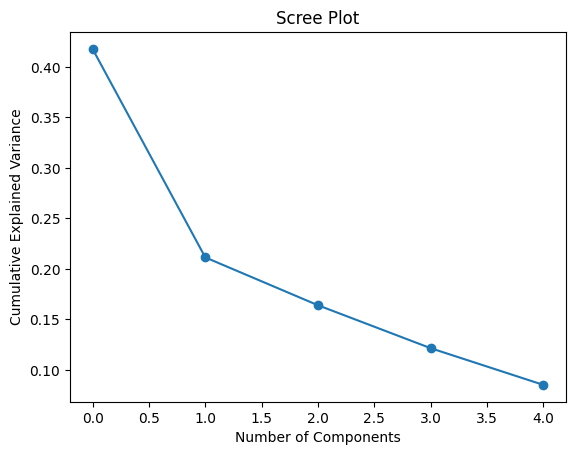

In [35]:
# Scree plot으로 사용할 주성분의 개수 정하기
import matplotlib.pyplot as plt

plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')

In [41]:
# 새로운 데이터프레임 확인
# PCA 객체 생성
pca = PCA(n_components=3)
# 3개의 주성분을 가진 데이터로 변환
principalComponents = pca.fit_transform(df3_num)
principal_df = pd.DataFrame(data = principalComponents,
                            columns = ['pc1', 'pc2', 'pc3'])
display(principal_df.head())
display(principal_df.shape)

,pc1,pc2,pc3
0,0.741056,-0.465380,-0.498208
1,-1.236799,0.219139,-0.177658
2,-1.230404,0.215472,-0.167501
3,1.952218,0.432803,-1.850842
4,-0.769023,0.008040,-0.219314


(200, 3)

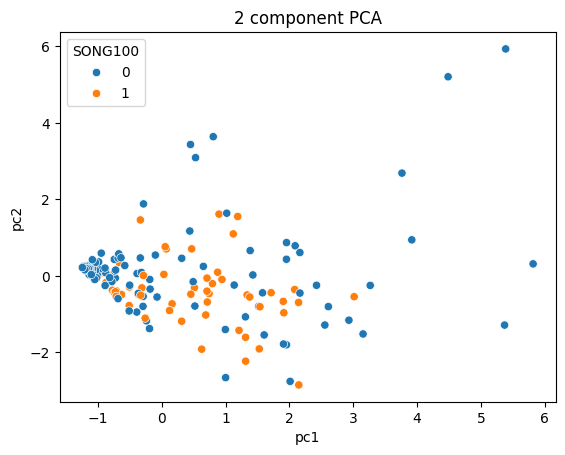

In [39]:
# 주성분 산포도 확인
import matplotlib.pyplot as plt
import seaborn as sns

# class 붙여주기
principal_df['SONG100'] = df['SONG100']

plt.title('2 component PCA')
sns.scatterplot(x ='pc1', y='pc2', hue = principal_df.SONG100, data=principal_df)
plt.show()

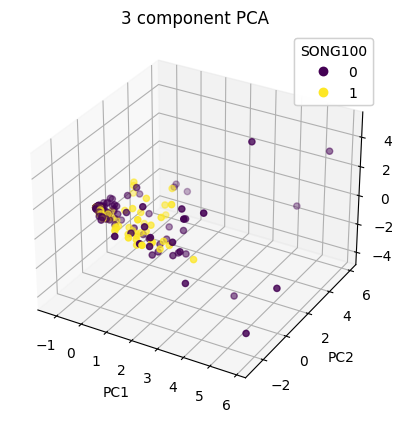

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# PCA 결과 데이터프레임에 주성분 추가
# principal_df['pc1'] = pca_fit[:, 0]
# principal_df['pc2'] = pca_fit[:, 1]
# principal_df['pc3'] = pca_fit[:, 2]

# class 붙여주기
principal_df['SONG100'] = df['SONG100']

# 3D 산포도 그리기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(principal_df['pc1'], principal_df['pc2'], principal_df['pc3'], c=principal_df['SONG100'], cmap='viridis')

# 축 레이블 설정
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3 component PCA')

# 범례 추가
legend1 = ax.legend(*scatter.legend_elements(), title="SONG100")
ax.add_artist(legend1)

plt.show()
